In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [30]:
data=pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [31]:
data.shape

(6362620, 11)

In [32]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


# Data Cleaning

## Checking for Missing Values

In [33]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### This DataSet cannot have outliers because every value is a true outlier (values that are too high or too less are a result of real life action and not data error)

In [34]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

#### As we can see that this data set is imbalanced it will perform poorly because it is biased towards '0' class, this can we solve by assigning larger weights to class with less values during training

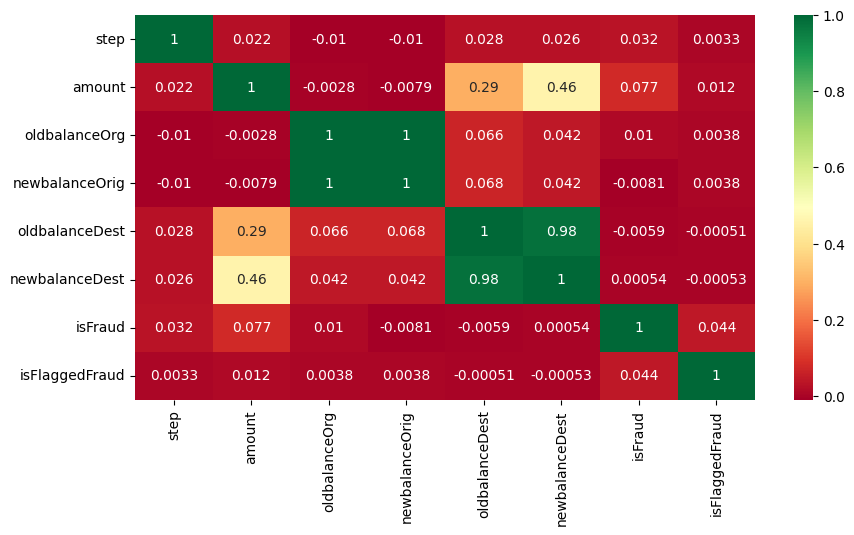

In [35]:
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True, cmap='RdYlGn');

#### Here there is a problem of multicolinearity this is addressed by normalising the data later on

In [36]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [37]:
data.groupby(['type','isFraud']).size().unstack(fill_value=0)

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


#### Here we can see that type cash out and transfer where fraud

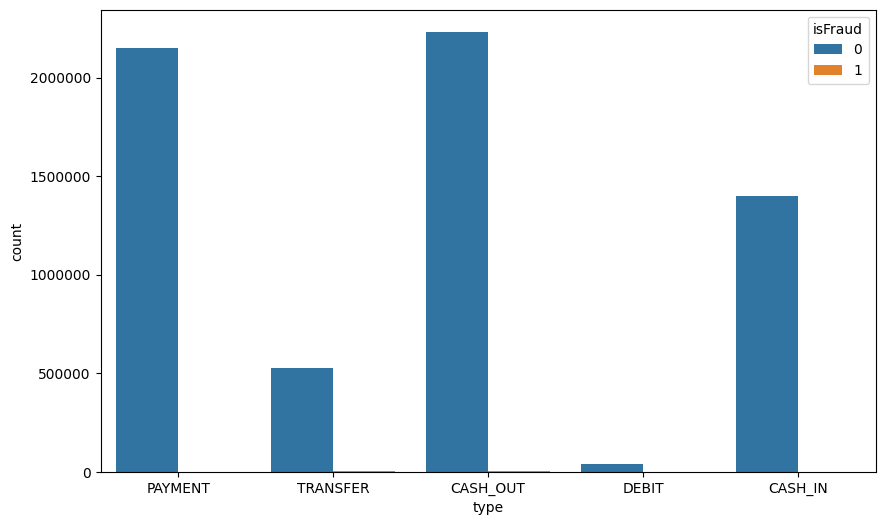

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='type',hue='isFraud')

# Format the y-axis to display real numbers
def format_func(value, tick_number):
    return int(value)  # Convert the y-value to an integer

ax.yaxis.set_major_formatter(FuncFormatter(format_func))

In [39]:
value=data['nameDest'].value_counts()
repeated=value[value>1].index
repeated=data[data['nameDest'].isin(repeated)]
repeated[repeated['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0


In [40]:
repeated['isFraud'].value_counts()

isFraud
0    4094376
1       5540
Name: count, dtype: int64

#### More frauds were caused when the reciever account was repeated more than once compared to senders, hence we must track the accounts with more number of transaction on reciever side

In [41]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [42]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.groupby('isFraud')['amount'].agg(['count', 'sum', 'mean'])

,count,sum,mean
isFraud,,,
0,6354407,1132336529331.93,178197.04
1,8213,12056415427.84,1467967.30


## Feature Engineering 

In [43]:
bins=[0,1000000,5000000,10000000,50000000,100000000]
labels=['0-10l','10l-50l','50l-1cr','1cr-5cr','5cr-10cr']
data['amount_bin'] = pd.cut(data['amount'], bins=bins, labels=labels)

In [44]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_bin
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0-10l
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0-10l
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0-10l
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0-10l
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0-10l


In [45]:
data['amount_bin'].value_counts()

amount_bin
0-10l       6231978
10l-50l      119111
50l-1cr        9072
1cr-5cr        2396
5cr-10cr         47
Name: count, dtype: int64

In [46]:
data.groupby(['isFraud','amount_bin']).size().unstack(fill_value=0)

C:\Users\91735\AppData\Local\Temp\ipykernel_26800\1898294702.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['isFraud','amount_bin']).size().unstack(fill_value=0)


amount_bin,0-10l,10l-50l,50l-1cr,1cr-5cr,5cr-10cr
isFraud,,,,,
0,6226487,117149,8328,2396,47
1,5491,1962,744,0,0


#### Here we can see that money that was subjected to fraud was less than 1 cr, highest for less than 10lakhs. So smaller transaction must be analysed

In [47]:
data['balance_change']=data['oldbalanceOrg']-data['newbalanceOrig']

In [48]:
data['transaction_validity_orig'] = data['balance_change'] == data['amount']

In [49]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_bin,balance_change,transaction_validity_orig
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0-10l,9839.64,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0-10l,1864.28,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0-10l,181.00,True
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0-10l,181.00,True
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0-10l,11668.14,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0-10l,339682.13,True
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,50l-1cr,6311409.28,True
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,50l-1cr,6311409.28,True
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0-10l,850002.52,True


In [50]:
data.groupby(['isFraud','transaction_validity_orig']).size().unstack()

transaction_validity_orig,False,True
isFraud,,
0,5922040,432367
1,69,8144


#### When balance change from sender account and amount in transaction was same, fraud occured

In [51]:
fr1=data[data['isFraud']==1]
fr1['balance_change'].mean()

1457274.9738755631

In [52]:
fr0=data[data['isFraud']==0]
fr0['balance_change'].mean()

-23141.516381549063

In [53]:
data['Des_balance_change']=data['newbalanceDest']-data['oldbalanceDest']

In [54]:
data['transaction_validity_Des'] = data['Des_balance_change'] == data['amount']

In [55]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_bin,balance_change,transaction_validity_orig,Des_balance_change,transaction_validity_Des
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0-10l,9839.64,False,0.00,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0-10l,1864.28,False,0.00,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0-10l,181.00,True,0.00,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0-10l,181.00,True,-21182.00,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0-10l,11668.14,True,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0-10l,339682.13,True,339682.13,True
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,50l-1cr,6311409.28,True,0.00,False
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,50l-1cr,6311409.28,True,6311409.27,False
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0-10l,850002.52,True,0.00,False


In [62]:
data.groupby(['isFraud','transaction_validity_Des']).size().unstack()

transaction_validity_Des,False,True
isFraud,,
0,5596218,758189
1,6042,2171


#### Most of the times when the amount in transaction and balance change of reciever was not same, fraud had occured

### Converting categorical values into numerical

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

col=['type','amount_bin']

for col in col:
     data[col + '_encoded'] = le.fit_transform(data[col])

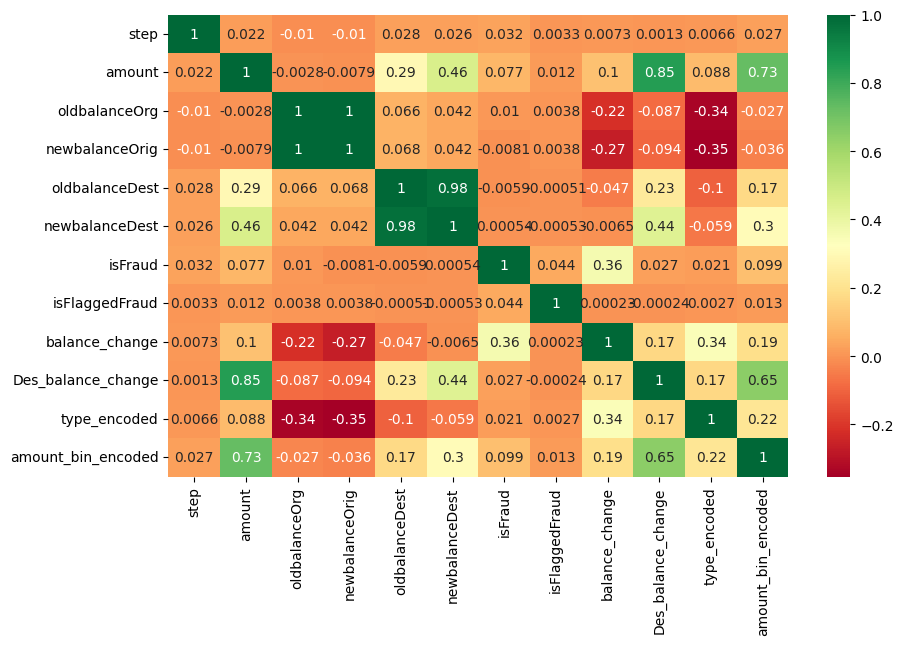

In [69]:
numeric_data=data.select_dtypes([np.number])
corr=numeric_data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True, cmap='RdYlGn');

### Dropping unnecessary columns

In [64]:
X=data[['amount',
'oldbalanceOrg',
'newbalanceOrig',
'oldbalanceDest',
'newbalanceDest',
'balance_change',
'Des_balance_change',
'type_encoded',
'amount_bin_encoded']]

#### These features are selected

amount:The transaction amount is a key indicator because low amount of money has lead to more fraud

oldbalanceOrg: This reflects the financial status of the originating account before the transaction. It helps assess the context of the transaction—fraudulent transactions might impact accounts with low balances more significantly.

newbalanceOrig: Shows how the transaction has affected the originating account's balance. A significant drop might indicate suspicious activity.

oldbalanceDest: Similar to oldbalanceOrg, this column shows the state of the destination account before receiving funds. It provides context about the recipient's financial situation.

newbalanceDest: Indicates how the transaction affected the recipient's account. If the new balance is unexpectedly high or low, it could signal fraudulent behavior.

balance_change:This feature indicates the direct impact of the transaction on the originating account's balance. Large changes could suggest fraud.

Des_balance_change: This feature reflects how much the destination account's balance has changed as a result of the transaction. 

type_encoded: Different transaction types may have different fraud risks associated with them. Encoding this information allows the model to categorize transactions appropriately based on type.

amount_bin_encoded: This feature categorizes the transaction amount into bins, allowing the model to capture the effect of amount size on fraud risk without requiring it to learn from raw numeric values

In [70]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balance_change,Des_balance_change,type_encoded,amount_bin_encoded
0,9839.64,170136.00,160296.36,0.00,0.00,9839.64,0.00,3,0
1,1864.28,21249.00,19384.72,0.00,0.00,1864.28,0.00,3,0
2,181.00,181.00,0.00,0.00,0.00,181.00,0.00,4,0
3,181.00,181.00,0.00,21182.00,0.00,181.00,-21182.00,1,0
4,11668.14,41554.00,29885.86,0.00,0.00,11668.14,0.00,3,0
...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,339682.13,339682.13,1,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,6311409.28,0.00,4,3
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,6311409.28,6311409.27,1,3
6362618,850002.52,850002.52,0.00,0.00,0.00,850002.52,0.00,4,0


In [71]:
y=data['isFraud']

In [72]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

## Data Normalization

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

## Splitting data for training and testing

In [74]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

### Model builing

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr=LogisticRegression(penalty='l2',class_weight='balanced',solver='lbfgs')
lr.fit(Xtrain,ytrain)

LogisticRegression(class_weight='balanced')

In [77]:
pred=lr.predict(Xtest)

In [78]:
from sklearn.metrics import classification_report,accuracy_score

accuracy_score(pred,ytest)

0.9642710078552545

In [79]:
cl=classification_report(pred,ytest)
print(cl)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98   1225904
           1       0.86      0.03      0.06     46620

    accuracy                           0.96   1272524
   macro avg       0.91      0.51      0.52   1272524
weighted avg       0.96      0.96      0.95   1272524



In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rc=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,class_weight='balanced')

In [82]:
rc.fit(Xtrain,ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=5)

In [85]:
pred=rc.predict(Xtest)

In [86]:
accuracy_score(pred,ytest)

0.9784601312038123

In [87]:
cl=classification_report(pred,ytest)
print(cl)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1243586
           1       0.97      0.05      0.10     28938

    accuracy                           0.98   1272524
   macro avg       0.98      0.53      0.55   1272524
weighted avg       0.98      0.98      0.97   1272524

